In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('../data/ENB2012_data.csv')

df = raw_data.copy()  # keep the raw data as original

In [3]:
# Have a quicklook in transposed mode

df.sample(5).T

,702,388,557,765,138
compactness,0.71,0.90,0.71,0.62,0.64
surface_area,710.50,563.50,710.50,808.50,784.00
wall_area,269.50,318.50,269.50,367.50,343.00
roof_area,220.50,122.50,220.50,220.50,220.50
height,3.50,7.00,3.50,3.50,3.50
orientation,4.00,2.00,3.00,3.00,4.00
glazing_area,0.40,0.25,0.40,0.40,0.10
glazing_distribution,4.00,3.00,1.00,5.00,2.00
heating,14.47,31.63,14.60,16.44,15.34
cooling,17.23,36.35,17.51,17.11,19.32


- Please refer to README.md for description of each parameter. 

- Since the dataset is created in laboratory, there isn't any missing value:

# Basic EDA

Check for missing values:

In [4]:
df.isnull().sum()

compactness             0
surface_area            0
wall_area               0
roof_area               0
height                  0
orientation             0
glazing_area            0
glazing_distribution    0
heating                 0
cooling                 0
dtype: int64

Check the index info, size and data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compactness           768 non-null    float64
 1   surface_area          768 non-null    float64
 2   wall_area             768 non-null    float64
 3   roof_area             768 non-null    float64
 4   height                768 non-null    float64
 5   orientation           768 non-null    int64  
 6   glazing_area          768 non-null    float64
 7   glazing_distribution  768 non-null    int64  
 8   heating               768 non-null    float64
 9   cooling               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Checking Parameters

A quick check for the ranges and outliers of each column by comparing min and max values with their mean.

In [6]:
df.describe().loc[['min', 'mean', 'max', 'std']]

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_distribution,heating,cooling
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306


There isn't any unreasonable value (e.g. 9999 or any negative)

## Checking  Uniqueness

Check the uniqueness of values in each column

In [7]:
df.nunique()

compactness              12
surface_area             12
wall_area                 7
roof_area                 4
height                    2
orientation               4
glazing_area              4
glazing_distribution      6
heating                 586
cooling                 636
dtype: int64

In accordance with the design of experiment, there are few options for input parameters. This would suggest considering some of them as categorical variable. However, being physical measures, most of them has to be kept as numeric. Check the orientation columns:

In [8]:
df.orientation.value_counts()

2    192
3    192
4    192
5    192
Name: orientation, dtype: int64

 One may claim that the 'orientation' column is not has to be numeric since it is not a direct measure (like area or height). This will be evalueated in Feature Engineering part.

## Check Target Variables

Since the target columns are mostly composed of non-unique values, check their distirution with visualization:

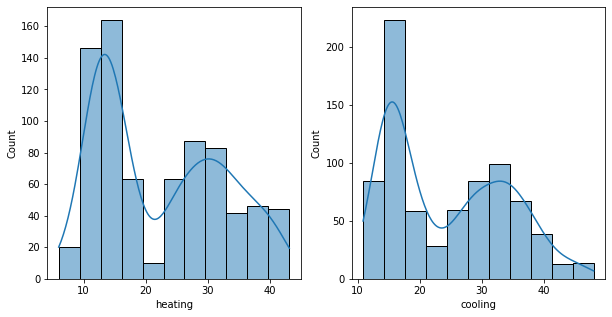

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df["heating"], kde=True)
plt.subplot(1,2,2)
sns.histplot(df["cooling"], kde=True)
plt.show()

Both target variable has high order of skewness that will be addressed in feature engineering part.

## Ranges and Interdependence of Parameters 

In order to evaluate the interdependence of variables, let's use pairplot and correlation heatnap.

THe diagonal of the pairplot shows the distribution of possible values of each parameter. The range of each parameter can be identified referring to labels on horizantal axis.

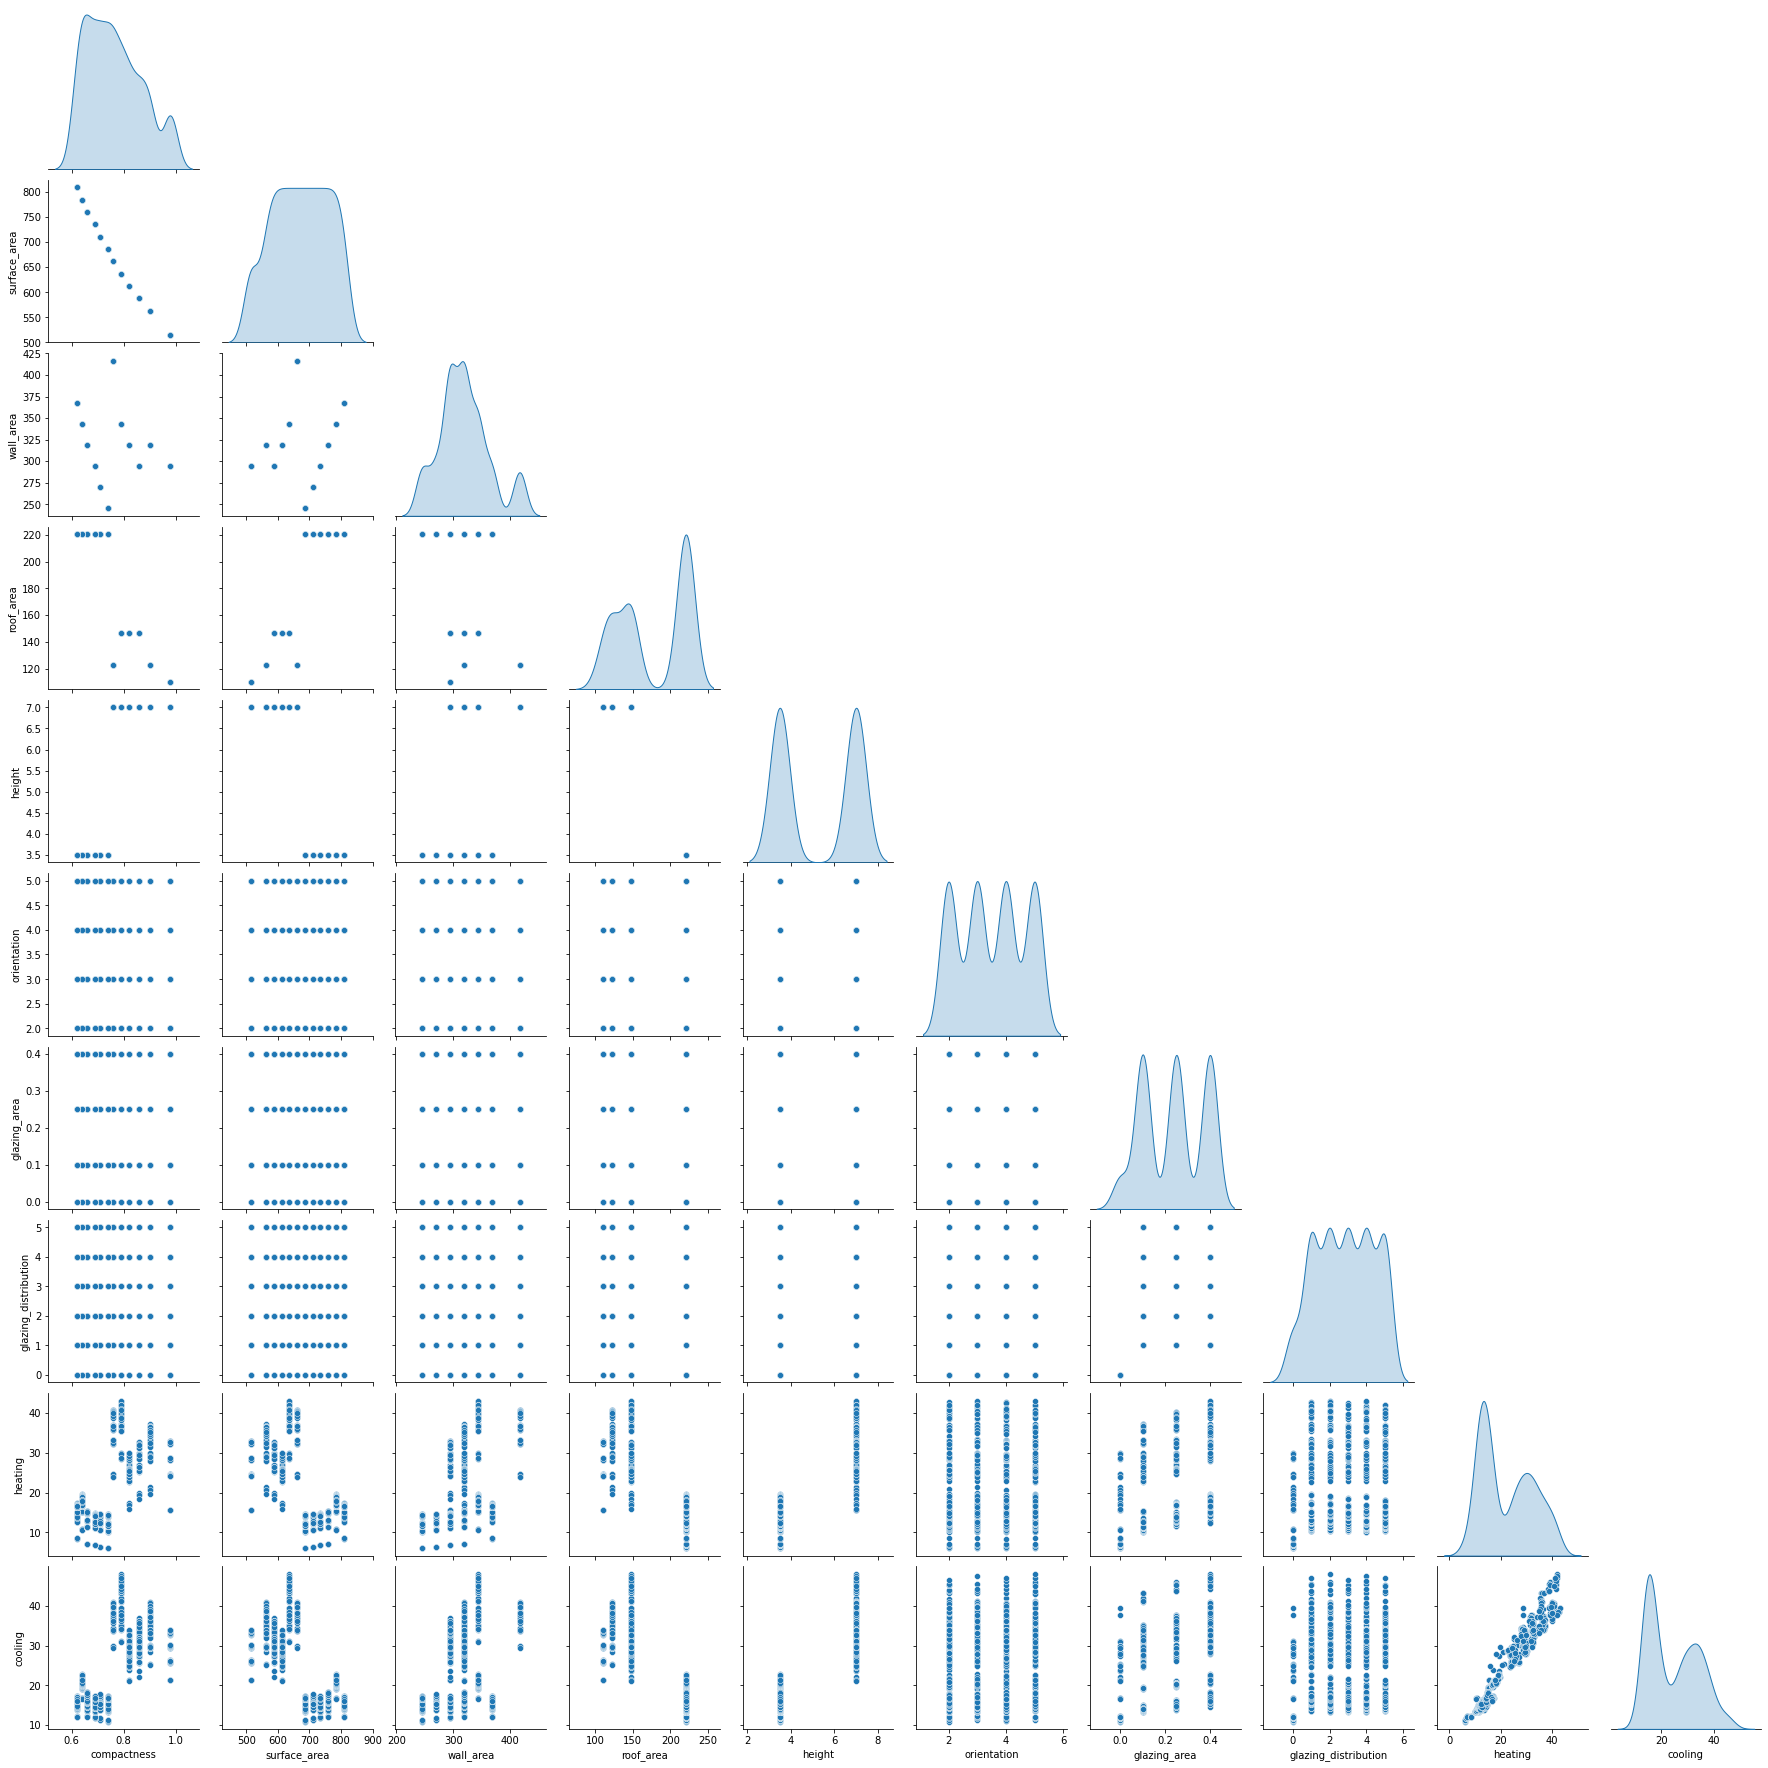

In [10]:
sns.pairplot(data=df, corner=True, diag_kind="kde")
plt.show()

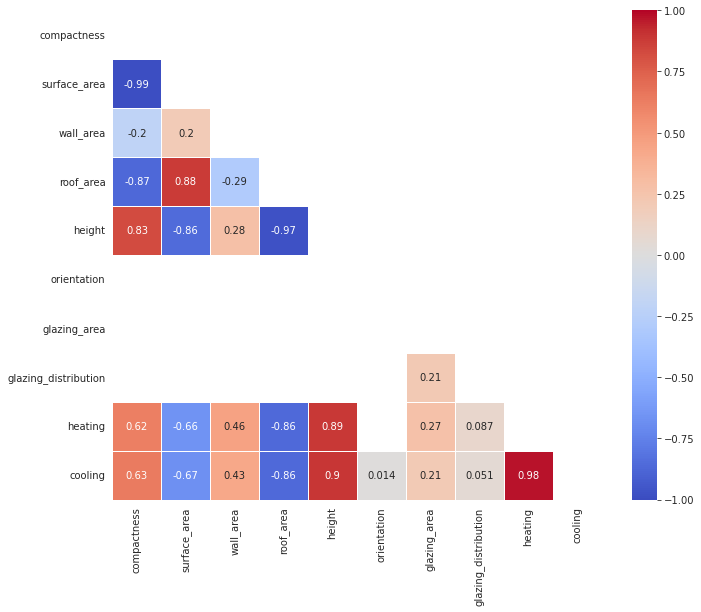

In [11]:
corr = df.corr()
corr = corr[np.abs(corr)>0.01] # Clear out so small values

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr,annot=True, mask=mask, vmin=-1, vmax=1, square=True,linewidths=.5, cmap="coolwarm")

The lower part of the triangle indicates the considerable correlation of target variables with most of the parameters. Only the orientation and glazing distibution has values close to zero:
- Remember that the orientation column was composed of integers that has no any physical meaning (not a measure). Actually, it shouldn't take place in these charts (just like in a case that they were represented as strings, e.g. "north")
- "glazing_distribution" is symmetrically distributed for non-zero values (see pairplot). There is only a small difference between the zero and non-zero cases.